In [1]:
pwd

'C:\\Users\\user\\OneDrive\\Desktop\\scatter-plotter'

In [2]:
cd C:\\Users\\user\\OneDrive\\Desktop\\csv files

C:\Users\user\OneDrive\Desktop\csv files


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
# check for the null values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# summary of the dataset
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [8]:
# data preprpcessing
df['reviews_per_month'].fillna(0,inplace = True)

In [9]:
df['name'].fillna("$",inplace=True)
df['host_name'].fillna("#",inplace=True)

In [10]:
df.drop(['last_review'],axis=1,inplace=True)

In [11]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [12]:
df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

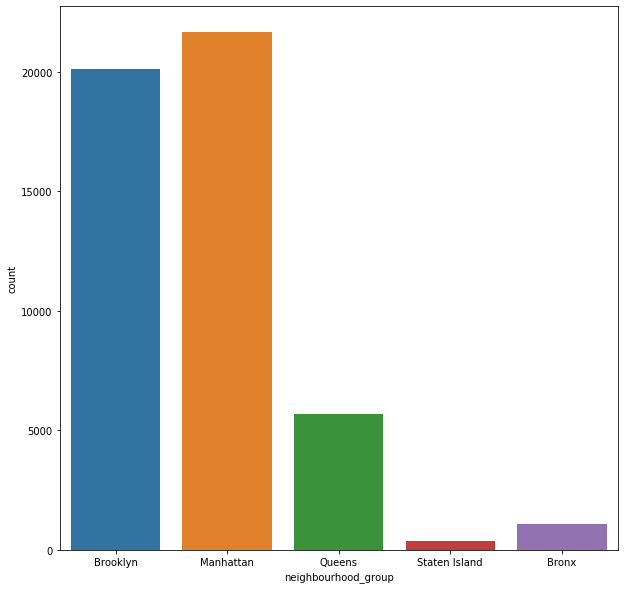

In [13]:
plt.figure(figsize=(10,10))
sns.countplot(df.neighbourhood_group)
plt.show()

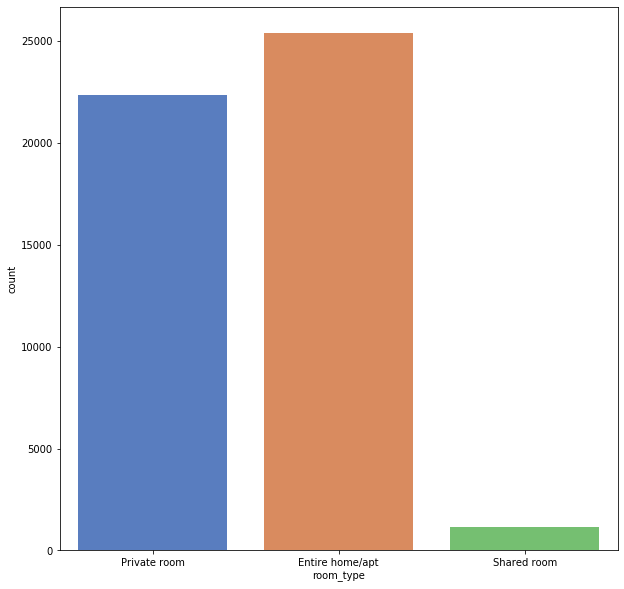

In [14]:
plt.figure(figsize=(10,10))
ax = sns.countplot(df.room_type,palette="muted")
plt.show()

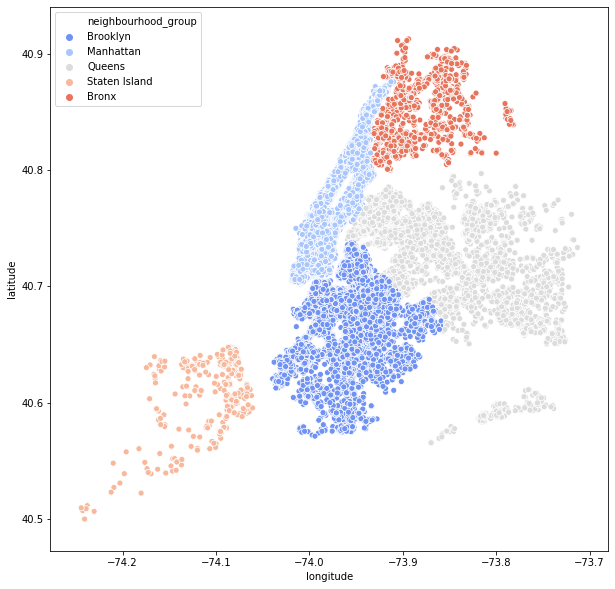

In [15]:
plt.figure(figsize=(10,10))
sns.scatterplot(y=df.latitude,x=df.longitude,hue=df.neighbourhood_group,palette="coolwarm")
plt.show()

<Figure size 720x720 with 0 Axes>

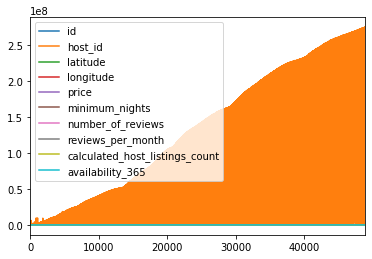

In [16]:
plt.figure(figsize=(10,10))
df1 = df[df.neighbourhood_group == 'Brooklyn'].plot()

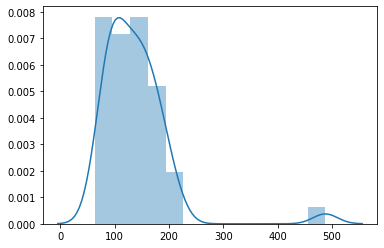

In [17]:
df1 = df[df.neighbourhood_group == "Brooklyn"][["neighbourhood","price"]]
d = df1.groupby("neighbourhood").mean()
sns.distplot(d)
plt.show()

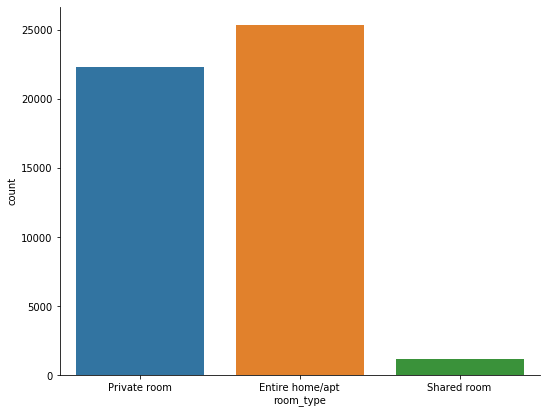

In [18]:
sns.catplot(x='room_type', kind='count' ,data=df)
fig = plt.gcf()
fig.set_size_inches(8, 6)

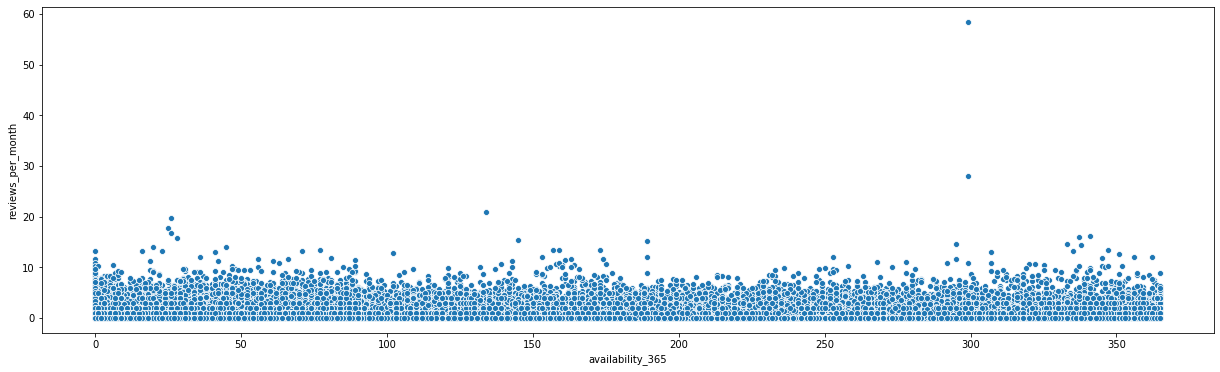

In [19]:
fig, axes = plt.subplots(1,1, figsize=(21,6))
sns.scatterplot(x= df['availability_365'], y=df['reviews_per_month'])

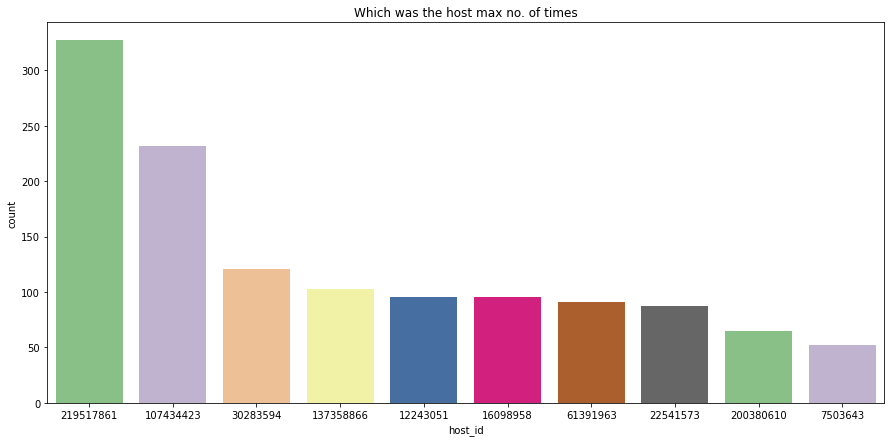

In [20]:
plt.figure(1, figsize=(15, 7))
plt.title("Which was the host max no. of times")
sns.countplot(x = "host_id", order=df['host_id'].value_counts().index[0:10] ,data=df,palette='Accent')

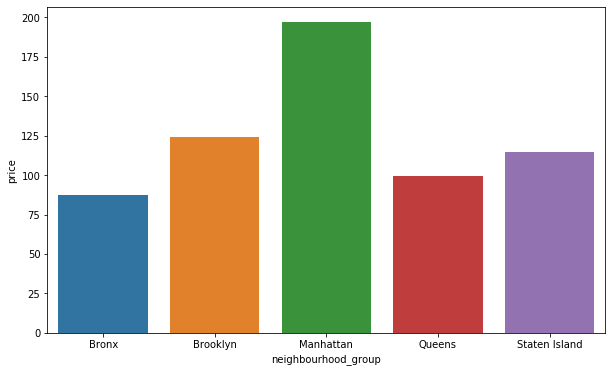

In [21]:
# Let's Examine the neighbourhood_group with prices
avg=df.groupby('neighbourhood_group',as_index=False)['price'].mean()
plt.figure(figsize=(10,6))
sns.barplot(avg['neighbourhood_group'], avg['price'])

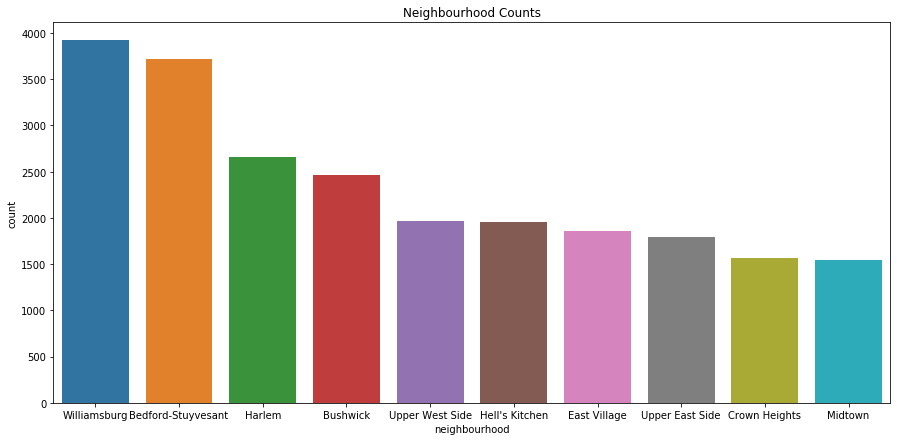

In [22]:
plt.figure(1, figsize=(15, 7))
plt.title("Neighbourhood Counts")
sns.countplot(x = "neighbourhood", order=df['neighbourhood'].value_counts().index[0:10] ,data=df)

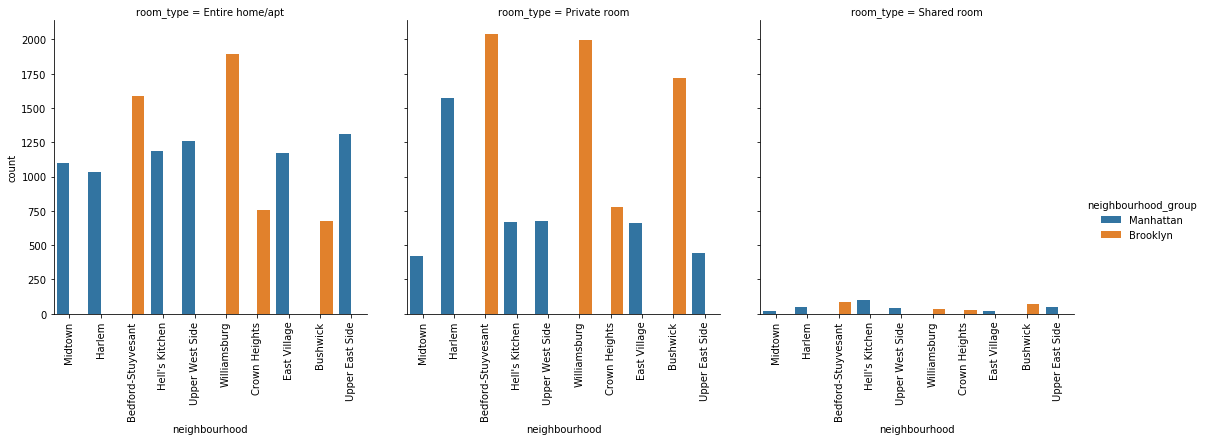

In [29]:
#taking top 10 neighbourhoods
nei=df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                                               'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side',
                                               'Crown Heights','Midtown'])]
#using factorplot to represent multiple interesting attributes together and a count
plot=sns.factorplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=nei, kind='count')
plot.set_xticklabels(rotation=90)

In [31]:
top=df.nlargest(15,'number_of_reviews')
top

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,891117,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,8168619,Steps away from Laguardia airport,37312959,Maya,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,834190,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Carol,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,3474320,Private brownstone studio Brooklyn,12949460,Asa,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,166172,LG Private Room/Family Friendly,792159,Wanda,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


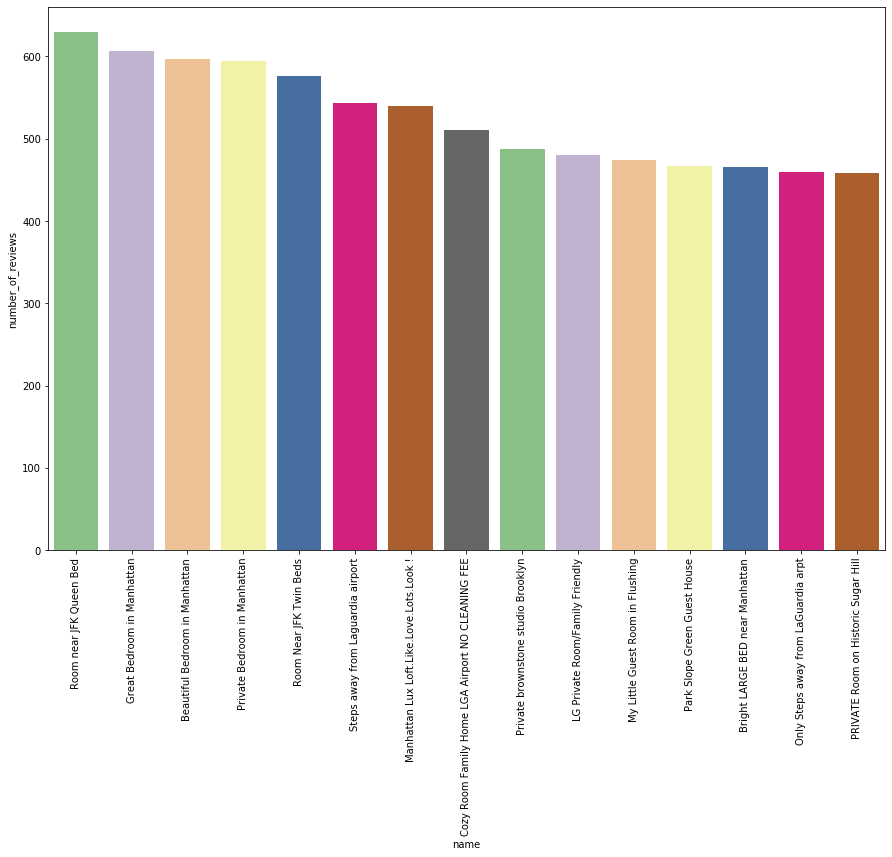

In [33]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(top['name'], top['number_of_reviews'], palette='Accent',data = df)

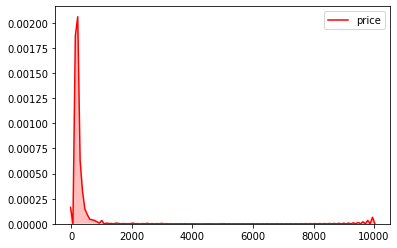

In [34]:
sns.kdeplot(df['price'],shade=True,color='r')

             id                                               name    host_id  \
48888  36484087  Spacious Room w/ Private Rooftop, Central loca...  274321313   
48886  36483010                    Comfy 1 Bedroom in Midtown East  274311461   
48884  36482783        Brooklyn Oasis in the heart of Williamsburg  274307600   
48881  36481615                   Peaceful space in Greenpoint, BK  274298453   
48875  36478343                              Welcome all as family  274273284   

       host_name neighbourhood_group   neighbourhood  latitude  longitude  \
48888        Kat           Manhattan  Hell's Kitchen  40.76392  -73.99183   
48886      Scott           Manhattan         Midtown  40.75561  -73.96723   
48884   Jonathan            Brooklyn    Williamsburg  40.71790  -73.96238   
48881     Adrien            Brooklyn      Greenpoint  40.72585  -73.94001   
48875  Anastasia           Manhattan     East Harlem  40.78749  -73.94749   

             room_type  price  minimum_nights  num

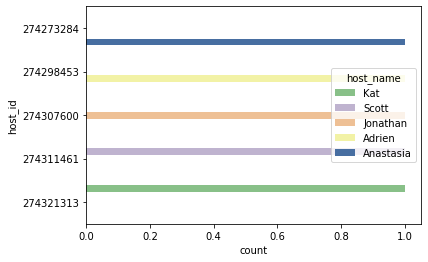

In [49]:
high=df.nlargest(5,'host_id')
print(high)
plt.xticks(rotation=360)
sns.countplot(hue = 'host_name', y = 'host_id', palette='Accent',data = high)